# [Species] Occurrence Records Summary
This notebook is a tool for exploring data sets requested from GBIF (and eventually other sources), and mostly for developing criteria for filtering records (filter sets).  When the entire notebook is run, it retrieves records according to the filter sets specified and saves the results (records and some summary tables) in an sqlite database.  Some information is pulled from the parameters.sqlite database that is saved in this repository.

### General Setup

In [1]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
#import geopandas as gpd
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()
import repo_functions as functions
import sys

sys.path.append("T:/GAP/Data")
import gapconfig as config

There is a bug with mpl_toolkits, the following code is a temp fix, hopefully.
https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

In [2]:
os.environ['PROJ_LIB'] = r'c:\Users\nmtarr\AppData\Local\Continuum\miniconda3\envs\occurrences\Library\share'

### Set Variables
Fill out stuff in this cell.  

Notes:
default_coordUncertainty -- coordinateUncertaintyInMeters is often not provided.  Here is an option to use a default.  If you don't want anything entered, set this equal to False (boolean, not string).

In [3]:
species_id = 'bdowox0'
summary_name = 'Downy'
gbif_req_id = 'GBIFr24'
gbif_filter_id = 'GBIFf9'
workDir = 'T:/temp/'
codeDir = 'T:/code/wildlife-wrangler/'
inDir = workDir + 'Inputs/'
outDir = workDir + 'Outputs/'
default_coordUncertainty = 200 # Note above.
SRID_dict = {'WGS84': 4326, 'AlbersNAD83': 102008} # Used in file names for output.
spdb = outDir + species_id + gbif_req_id + gbif_filter_id + '.sqlite'

username = config.gbif_username
password = config.gbif_password
email = config.gbif_email

print("Notebook run " + str(t1))
print(spdb)

Notebook run 2020-03-10 09:35:32.237702
T:/temp/Outputs/bdowox0GBIFr24GBIFf9.sqlite


In [4]:
connjup = sqlite3.connect(codeDir + 'parameters.sqlite')
cursorjup = connjup.cursor()

# Get some variables
years = connjup.execute("""SELECT years_range 
                           FROM gbif_requests WHERE request_id = '{0}'""".format(gbif_req_id)).fetchone()[0]
gap_id = connjup.execute("""SELECT gap_id
                            FROM species_concepts WHERE species_id = '{0}'""".format(species_id)).fetchone()[0]
common_name = connjup.execute("""SELECT common_name
                                 FROM species_concepts WHERE species_id = '{0}'""".format(species_id)).fetchone()[0]

# Species Concept
Display information on the species from the parameters.sqlite database.

In [5]:
vals = cursorjup.execute("SELECT * FROM species_concepts WHERE species_id = '{0}';".format(species_id)).fetchall()[0]
cols = [x[1] for x in cursorjup.execute("PRAGMA table_info('species_concepts')").fetchall()]
pprint.pprint(dict(zip(cols, vals)))

{'bcb_id': None,
 'breeding_months': None,
 'common_name': 'downy woodpecker',
 'detection_distance_meters': 200,
 'ebird_id': None,
 'end_year': None,
 'error_tolerance': 20,
 'fws_id': None,
 'gap_id': 'bdowox',
 'gbif_id': '2477781',
 'geometry': None,
 'itis_tsn': '178259',
 'lumped_into': 'Dryobates pubescens',
 'migratory': None,
 'notes': None,
 'pad': 1,
 'scientific_name': 'picoides pubescens',
 'species_id': 'bdowox0',
 'split_from': None,
 'start_year': None,
 'vetted_date': None,
 'vetted_how': None,
 'vetted_who': None,
 'wintering_months': None}


# Filters
Display the parameters of the request filter set.  These are deployed during the step where records are retrieved from the API.

In [6]:
df1 = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id), con=connjup)
print("THE REQUEST FILTER SET")
print(df1.loc[0])

THE REQUEST FILTER SET
request_id                                         GBIFr24
source                                                GBIF
lat_range                                             None
lon_range                                             None
years_range                                      1999,2020
months_range                                          1,12
geoissue                                             False
coordinate                                            True
country                                                 US
geometry                                              None
creator                                            N. Tarr
notes           Used for tests of large download function.
Name: 0, dtype: object


Display the parameters of the post-request filter set.  These are deployed after the records are retrieved from the API, but before they are stored in the occurrence record sqlite database.

In [7]:
df2 = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(gbif_filter_id), con=connjup)
print("THE POST REQUEST FILTER SET")
print(df2.loc[0])

THE POST REQUEST FILTER SET
filter_id                                                               GBIFf9
dataset                                                                   GBIF
collection_codes_omit                                                         
institutions_omit                                                             
has_coordinate_uncertainty                                                   0
max_coordinate_uncertainty                                               10000
bases_omit                                                                    
protocols_omit                                                                
sampling_protocols_omit                                                       
issues_omit                                                               None
duplicates_OK                                                             True
creator                                                                N. Tarr
notes                   

## Filter set justification
**default_coord_uncertainty:** 

**years_range:**

**months_range:** 

**geoissue:** 

**coordinate:** 

**country:**

**geometry:**

**collection_codes_omit:** 

**institutions_omit:** 

**has_coordinate_uncertainty:** 

**max_coordinate_uncertainty:** 

**bases_omit:** 

**protocols_omit:**

**sampling_protocols_omit:** 

**issues_omit:**

**duplicates:**

In [8]:
functions.retrieve_gbif_occurrences(codeDir, species_id, inDir, spdb, gbif_req_id, gbif_filter_id, 
                                    default_coordUncertainty, outDir, summary_name, username,
                                   password, email)

SPATIALITE_SECURITY set to relaxed
Created occurrence db: 0:00:00.475977
Got request params and sorted out geometry constraints: 0:00:00.000996
255008 records available
Your download key is  0014856-200221144449610
Download file size: 39053439 bytes
On disk at T:/temp/Inputs//0014856-200221144449610.zip
Download complete: 0:07:15.715142
Reading and saving downloaded records: 0:00:16.101920
Summarized fields returned: 0:00:01.027915
Created summary table of request results: 0:00:00.171776
Performed post-request filtering: 0:00:00.498879
Calculated new columns: 0:00:00.223053
Inserted records into table: 0:00:08.219781
Summarized unique values retained: 0:00:00.131248
Updated occurrences table geometry column: 0:01:13.205074
DUPLICATES ON LATITUDE, LONGITUDE, DATE-TIME INCLUDED
Buffered points: 0:02:31.999870
Exported maps: 0:01:08.320295

Records saved in T:/temp/Outputs/bdowox0GBIFr24GBIFf9.sqlite


### How many records made it through the filters?
This is the number that was actually saved in the occurrence record sqlite database.

In [8]:
conn_occ= sqlite3.connect(spdb)
curs_occ = conn_occ.cursor()
record_count = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences WHERE species_id = '{0}'".format(species_id)).fetchone()
print(str(record_count[0]) + " records")

254979 records


### Are there duplicate records left?
Duplicates based on latitude, longitude, and date-time should of been removed, with the record with the highest individualCount retained.

In [9]:
dups0 = curs_occ.execute("""SELECT count(occ_id) FROM occurrences WHERE occ_id NOT IN (SELECT occ_id FROM occurrences GROUP BY latitude, longitude, occurrenceDate HAVING max(IndividualCount));""").fetchall()
print(str(dups0[0][0]) + ' duplicate records retained based on xy coordinate and date-time')

254856 duplicate records retained based on xy coordinate and date-time


# Institutions
#### Pre-filters

In [11]:
institutions = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'institutions';").fetchall()
for x in institutions:
    print(x[0] + " ({0})".format(x[1]))

#### Post-filter

In [12]:
institutions = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'institutions' AND step = 'filter';").fetchone()[0]
institutions = institutions.replace('[', '').strip().replace(']', '').replace("'", "")
institutions = institutions.split(',')
for ins in institutions:
    print(ins.strip())

CUMV
urn:lsid:biocol.org:col:34939
WFVZ
DMNH
BGBM
SDNHM
urn:lsid:biocol.org:col:34967
SBMNH
DMNS
urn:lsid:biocol.org:col:34925
urn:lsid:biocol.org:col:35009
AMNH
PRBO
b4640710-8e03-11d8-b956-b8a03c50a862
LACM
CAS
http://biocol.org/urn:lsid:biocol.org:col:34871
http://grbio.org/cool/daw7-8h44
http://biocol.org/urn:lsid:biocol.org:col:34940
MMNH
NYSM
OMNH
urn:lsid:biocol.org:col:34825
PSM
UWBM
urn:lsid:biocol.org:col:34844
CHAS
nan
urn:lsid:biocol.org:col:34834
ISU
http://grbio.org/cool/iakn-125z
http://grbio.org/cool/i64g-wjcr
Borror Laboratory of Bioacoustics
Ohio State University
Columbus
OH (BLB)
Ohio State University - Bird Division
Columbus
OH (OSUM)
RSL
http://biocol.org/urn:lsid:biocol:org:34802
TCWC
urn:lsid:biocol.org:col:34836
Anymals.org
KU
Bird Studies Canada - Etudes dOiseaux Canada
CLO
BSC
USNM
CMNH
MSB
UMMZ
urn:lsid:biocol.org:col:34878
MCZ


# Collections
#### Pre-filters

In [13]:
collections = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'collections';").fetchall()
for x in collections:
    print(x[0] + " ({0})".format(x[1]))

#### Post-filters

In [14]:
collections = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'collections' AND step = 'filter';").fetchone()[0]
collections = collections.replace('[', '').strip().replace(']', '').replace("'", "")
collections = collections.split(',')
for colls in collections:
    print(colls.strip())

AV
Orn
Marsh Monitoring Program
Bird Records
ML
MMP
user: 6025
user: 7136
Recordings
PC
nan
PRBO-PC
user: 1475
Birds
ZO
BoBO
GBBC
user: 5465
birds
ORN
Bird
OCGR
Bird specimens


# Bases
#### Pre-filter

In [15]:
bases = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'bases';").fetchall()
for x in bases:
    print(x[0] + " ({0})".format(x[1]))

#### Post-filters

In [16]:
bases = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'bases' AND step = 'filter';").fetchone()[0]
bases = bases.replace('[', '').strip().replace(']', '').replace("'", "")
bases = bases.split(",")
for bas in bases:
    print(bas.strip())

MACHINE_OBSERVATION
OBSERVATION
PRESERVED_SPECIMEN
HUMAN_OBSERVATION


# Protocols
#### Pre-filters

In [17]:
protos = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'protocols' AND step = 'request';").fetchall()[0]
for pro in protos:
    pro = pro.replace('[', '').strip().replace(']', '').replace("'", "")
    print(pro)

2020-02-11T00:10:58.968Z, 2020-02-11T00:11:04.656Z, 2020-02-11T00:10:56.506Z, 2020-02-11T00:11:33.715Z, 2020-02-12T14:45:03.807Z, 2020-02-11T00:11:40.274Z, 2020-02-11T00:11:33.426Z, 2020-02-11T00:11:12.529Z, 2020-02-11T00:11:28.586Z, 2020-02-11T00:11:30.543Z, 2020-02-11T00:10:53.675Z, 2020-02-11T00:10:53.633Z, 2020-02-11T00:11:04.750Z, 2020-02-11T00:11:36.359Z, 2020-02-11T00:10:53.448Z, 2020-02-11T00:11:05.396Z, 2020-02-11T00:11:35.667Z, 2020-02-11T00:10:33.423Z, 2020-02-11T00:10:45.253Z, 2020-02-11T00:11:13.390Z, 2020-02-11T00:11:26.076Z, 2020-02-11T00:11:23.457Z, 2020-02-11T00:11:14.850Z, 2020-02-11T00:10:50.343Z, 2020-02-11T00:10:39.879Z, 2020-02-11T00:11:29.660Z, 2020-02-11T00:11:39.932Z, 2020-02-11T00:10:53.382Z, 2020-02-11T00:11:23.442Z, 2020-02-11T00:10:32.161Z, 2020-02-11T00:11:39.950Z, 2020-02-11T00:11:39.658Z, 2020-02-11T00:10:59.572Z, 2020-02-11T00:11:29.351Z, 2020-02-11T00:11:12.172Z, 2020-02-11T00:11:31.054Z, 2020-02-11T00:10:56.787Z, 2020-02-11T00:11:19.196Z, 2020-02-11T0

#### Post-filters

In [18]:
protos = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'protocols' AND step = 'filter';").fetchall()[0]
for pro in protos:
    pro = pro.replace('[', '').strip().replace(']', '').replace("'", "")
    print(pro)

2020-02-11T00:10:58.968Z, 2020-02-11T00:11:04.656Z, 2020-02-11T00:10:56.506Z, 2020-02-11T00:11:33.715Z, 2020-02-12T14:45:03.807Z, 2020-02-11T00:11:40.274Z, 2020-02-11T00:11:33.426Z, 2020-02-11T00:11:12.529Z, 2020-02-11T00:11:28.586Z, 2020-02-11T00:11:30.543Z, 2020-02-11T00:10:53.675Z, 2020-02-11T00:10:53.633Z, 2020-02-11T00:11:04.750Z, 2020-02-11T00:11:36.359Z, 2020-02-11T00:10:53.448Z, 2020-02-11T00:11:05.396Z, 2020-02-11T00:11:35.667Z, 2020-02-11T00:10:33.423Z, 2020-02-11T00:10:45.253Z, 2020-02-11T00:11:13.390Z, 2020-02-11T00:11:26.076Z, 2020-02-11T00:11:23.457Z, 2020-02-11T00:11:14.850Z, 2020-02-11T00:10:50.343Z, 2020-02-11T00:10:39.879Z, 2020-02-11T00:11:29.660Z, 2020-02-11T00:11:39.932Z, 2020-02-11T00:10:53.382Z, 2020-02-11T00:11:23.442Z, 2020-02-11T00:10:32.161Z, 2020-02-11T00:11:39.950Z, 2020-02-11T00:11:39.658Z, 2020-02-11T00:10:59.572Z, 2020-02-11T00:11:29.351Z, 2020-02-11T00:11:12.172Z, 2020-02-11T00:11:31.054Z, 2020-02-11T00:10:56.787Z, 2020-02-11T00:11:19.196Z, 2020-02-11T0

# Issues
#### Pre-filters

In [19]:
issues = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'issues' AND step = 'request';").fetchone()[0]
issues = issues.replace('[', '').strip().replace(']', '').replace("'", "")
issues = issues.split(',')
for iss in issues:
    print(iss.strip())

GEODETIC_DATUM_INVALID
COORDINATE_REPROJECTED
COUNTRY_DERIVED_FROM_COORDINATES
COORDINATE_PRECISION_INVALID
TAXON_MATCH_HIGHERRANK
nan
COORDINATE_ROUNDED
PRESUMED_NEGATED_LONGITUDE
GEODETIC_DATUM_ASSUMED_WGS84
RECORDED_DATE_MISMATCH


#### Post-filters

In [20]:
issues = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'issues' AND step = 'filter';").fetchone()[0]
issues = issues.replace('[', '').strip().replace(']', '').replace("'", "")
issues = issues.split(',')
for iss in issues:
    print(iss.strip())

GEODETIC_DATUM_INVALID
COORDINATE_REPROJECTED
COUNTRY_DERIVED_FROM_COORDINATES
COORDINATE_PRECISION_INVALID
UNKNOWN
COORDINATE_ROUNDED
PRESUMED_NEGATED_LONGITUDE
GEODETIC_DATUM_ASSUMED_WGS84
RECORDED_DATE_MISMATCH


# Descriptions of filtered records

### Locations

T:\code\wildlife-wrangler\repo_functions.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  height=3200000, width=5000000)
T:\code\wildlife-wrangler\repo_functions.py:44: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawstates(color='grey')
T:\code\wildlife-wrangler\repo_functions.py:45: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawcountries(color='grey')
T:\code\wildlife-wrangler\repo_functions.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  color=mapfile['linecolor'])


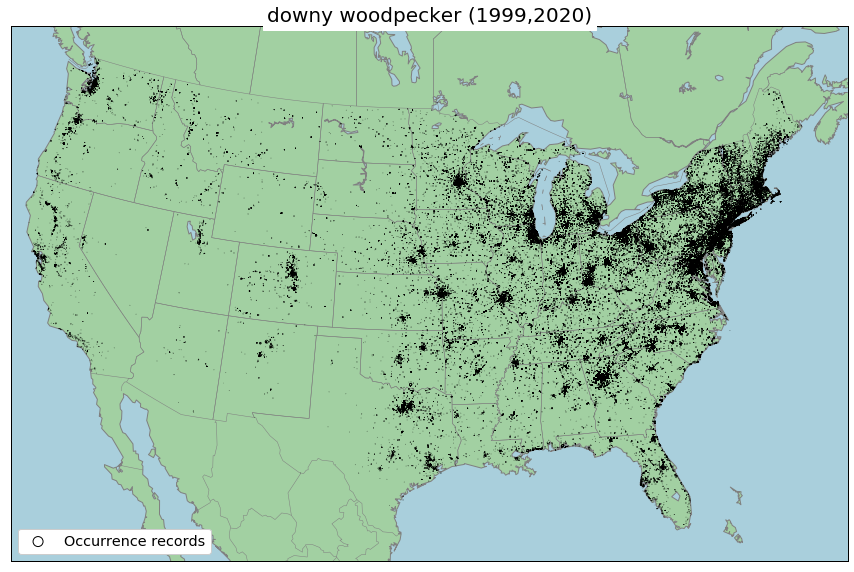

In [21]:
shp1 = {'file': '{0}{1}_polygons'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'k',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
map_these=[shp1]
    
title="{1} ({0})".format(years, common_name)
functions.MapShapefilePolygons(map_these=map_these, title=title)

### Years represented

Text(0.5, 1.0, 'Occurrences per Year')

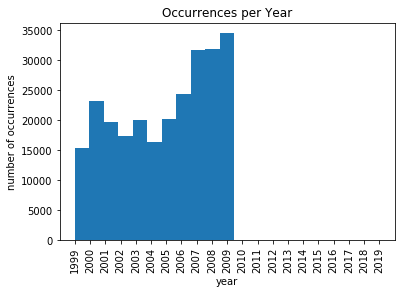

In [22]:
occ_years = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%Y', occurrenceDate) FROM occurrences").fetchall()]
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id)).fetchone()[0]
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of occurrences")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### Months represented

Text(0.5, 1.0, 'Occurrences per Month')

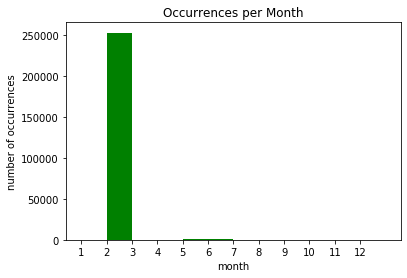

In [23]:
occ_months = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%m', occurrenceDate) FROM occurrences").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of occurrences")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### Distribution of coordinate uncertainty values

Text(0.5, 1.0, 'Coordinate Uncertainty')

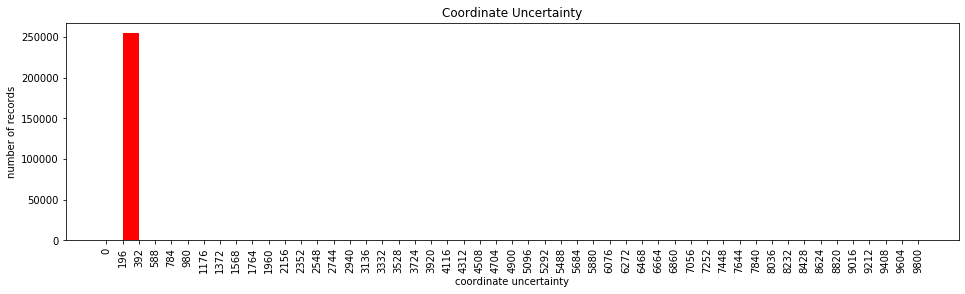

In [24]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty')

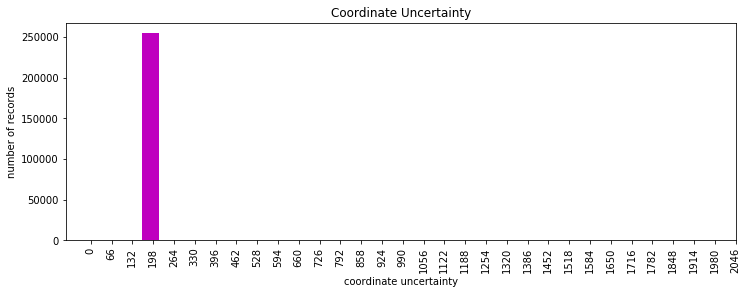

In [25]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

### Geodetic datums present

In [26]:
datums = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'datums' AND step = 'filter';").fetchone()[0]
datums = datums.replace('[', '').strip().replace(']', '').replace("'", "")
datums = datums.split()
for datum in datums:
    print(datum)

WGS84


### Establishment means reported

In [27]:
establishment = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'establishment' AND step = 'filter';").fetchall()[0]
for est in establishment:
    est = est.replace('[', '').strip().replace(']', '').replace("'", "")
    print(est)

### Identification qualifiers included

In [28]:
quali = curs_occ.execute("SELECT DISTINCT vals FROM record_attributes WHERE field = 'IDqualifier' AND step = 'filter';").fetchall()[0]
for q in quali:
    q = q.replace('[', '').strip().replace(']', '').replace("'", "")
    print(q)

nan, A


### Remarks included

In [29]:
remarks = curs_occ.execute("SELECT DISTINCT remarks FROM occurrences;").fetchall()
#remarks = remarks.replace('[', '').strip().replace(']', '').replace("'", "")
#remarks = remarks.split(',')
if len(remarks) <= 20:
    for rem in remarks:
        if rem[0][0:1] == ';':
            print(rem[0][2:])
        else:
            print(rem[0])
else:
    print("More than 20 remarks, consult the occurrence database.")

TypeError: 'NoneType' object is not subscriptable

### Sources

In [ ]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

### Attributes returned for the records in the request (pre-filters)

In [ ]:
fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", conn_occ)#, index_col='index')
fields_summary.index.name = 'Field'
print(fields_summary)

### Runtime

In [ ]:
t2 = datetime.now()
print(t2 - t1)